# Instalação das Dependências

In [ ]:
# author: Jonathan Alves de Lima (PUC Minas)

# installing the Yahoo Finance Library
!pip install yfinance --upgrade --no-cache-dir

# ignoring future-warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importing libraries to the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

# importing machine learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# allows pandas_datareader to get yahoo data (returns dataframe)
yf.pdr_override()

In [ ]:
# setting style fot pyplot
#plt.style.use('bmh')
plt.style.use('default')

# Dataset índice IBOVESPA

## Importação dos Datasets (Somente IBOV)

In [ ]:
# setting start and end dates
start_date = "2015-01-01"
end_date = "2020-06-01"

# loading IBOV Index data inside a dataframe
df_ibov = web.get_data_yahoo('^BVSP', start=start_date, end=end_date)

## Tratamentos e Análises do dataset IBOV

In [ ]:
# checking if we have any NaN
df_ibov.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# create a variable with only close price
df_close = df_ibov['Close']
# converting the pandas series to dataframe
df_close = df_close.to_frame()

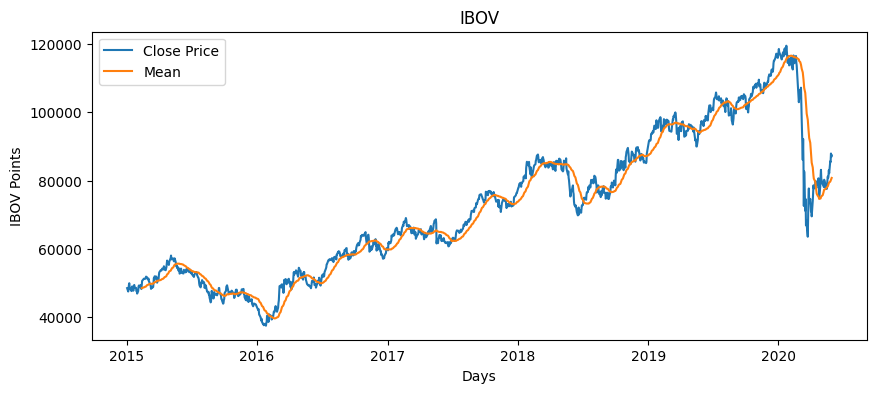

In [ ]:
# visualize the close price data
plt.figure(figsize=(10, 4))
plt.title('IBOV')
plt.xlabel('Days')
plt.ylabel('IBOV Points')
plt.plot(df_close['Close'])
plt.plot(df_close.rolling(window=30).mean()['Close'])  # mean last 30 days
plt.legend(['Close Price', 'Mean'])
plt.show()

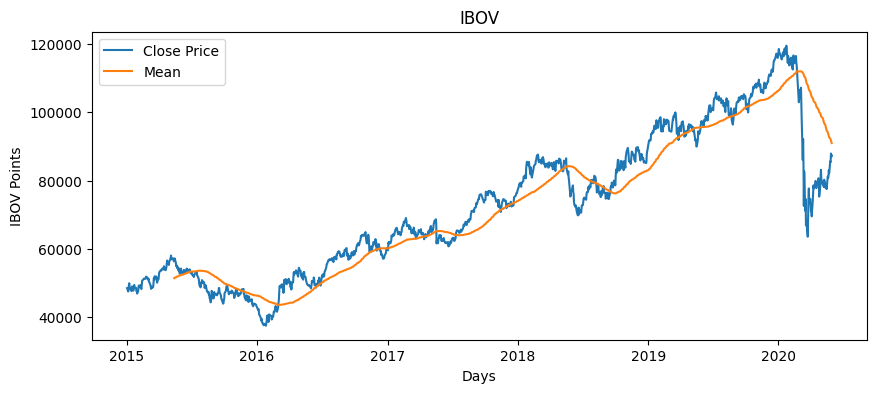

In [ ]:
# visualize the close price data
plt.figure(figsize=(10, 4))
plt.title('IBOV')
plt.xlabel('Days')
plt.ylabel('IBOV Points')
plt.plot(df_close['Close'])
plt.plot(df_close.rolling(window=90).mean()['Close'])  # mean last 30 days
plt.legend(['Close Price', 'Mean'])
plt.show()

#Dataset Ações: ITUB4, B3SA3 e Índice IBOVESPA

## Importando Dataset Ações (IBOV | ITUB4 | B3SA3)

In [ ]:
# importing financial stocks data from Yahoo Finance
df_acoes = pd.DataFrame()
tickers = ['ITUB4.SA', 'B3SA3.SA','^BVSP']
for ticker in tickers:
  df_acoes[ticker] = web.get_data_yahoo(ticker, start = start_date, end = end_date)['Close']

# renaming the columns 
df_acoes.rename(columns = {'ITUB4.SA': 'ITUB4', 'B3SA3.SA':'B3SA3', '^BVSP':'IBOV'}, inplace=True)

# normalizing the ibov data (dividing by 1000)
df_acoes['IBOV'] /= 1000

## Tratamentos e Análise do Datasets Ações

In [ ]:
# reseting the index (using only 0 to lenght)
df_acoes.reset_index(inplace = True)

In [ ]:
print(df_acoes.isna().sum())

In [ ]:
print(df_acoes[df_acoes.isna().any(axis=1)])

In [ ]:
# deleting NaN
df_acoes.dropna(inplace=True)

# checking the result
print(df_acoes.isna().sum())

In [ ]:
# getting the names of the adjusted tickers
tickers = list(df_acoes.drop(['Date'], axis = 1).columns) # if reset index
#tickers = list((df_acoes.columns)) # if index is not reset
#tickers.remove('Date')
print(tickers)

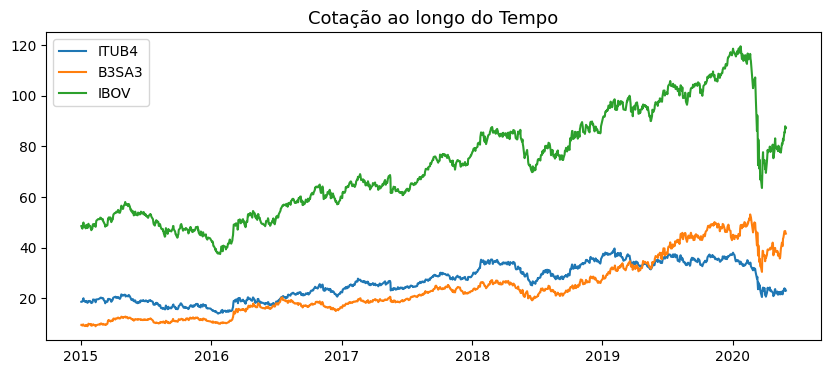

In [ ]:
# ploting the cotations
plt.figure(figsize=(10, 4))
for ticker in tickers:
  plt.plot(df_acoes['Date'], df_acoes[ticker])

plt.legend(tickers, loc='upper left')
plt.title('Cotação ao longo do Tempo', fontsize = 13)
plt.show()

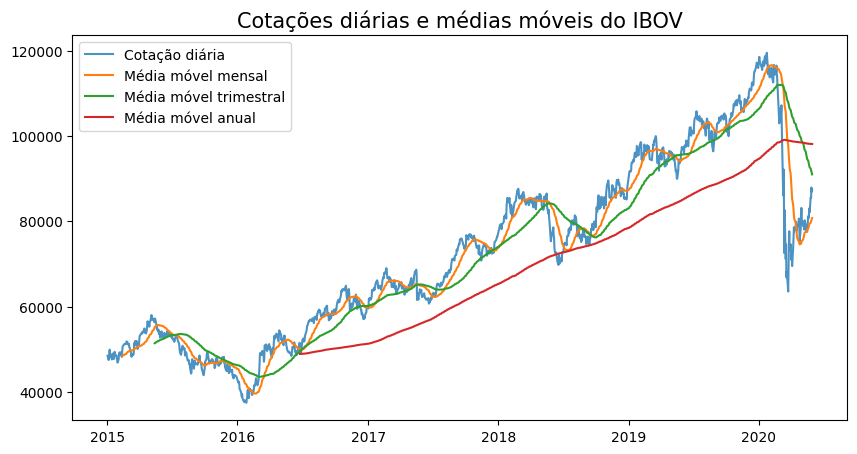

In [ ]:
# Médias móveis do IBOV
plt.figure(figsize=(10,5))
plt.plot(df_acoes['Date'], df_acoes['IBOV']*1000, alpha = 0.8)
plt.plot(df_acoes['Date'],df_acoes['IBOV'].rolling(window = 30).mean()*1000)
plt.plot(df_acoes['Date'],df_acoes['IBOV'].rolling(window = 90).mean()*1000)
plt.plot(df_acoes['Date'],df_acoes['IBOV'].rolling(window = 365).mean()*1000)
plt.title('Cotações diárias e médias móveis do IBOV', fontsize = 15)
plt.legend(['Cotação diária','Média móvel mensal','Média móvel trimestral','Média móvel anual'])
plt.show()

In [ ]:
# calculating the returns of stocks in the period
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = df_acoes[ticker].pct_change() 
returns['Date'] = df_acoes['Date']
returns.describe()

# pct_change function calculates the percentage change between the current and a prior element.
# pelo std podemos ver que o IBOV foi o menos volátil, enquando o SANB4 apresentou maior variaão no mesmo período
# o retorno diário médio do ITUB4 foi o menor, enquanto a B3 apresentou maior retorno diário

,ITUB4,B3SA3,IBOV
count,1333.000000,1333.000000,1333.000000
mean,0.000380,0.001467,0.000596
std,0.021013,0.024158,0.017468
min,-0.120468,-0.161204,-0.147797
25%,-0.011111,-0.011236,-0.007798
50%,0.000249,0.000914,0.000839
75%,0.011437,0.014603,0.009452
max,0.110593,0.192447,0.139082


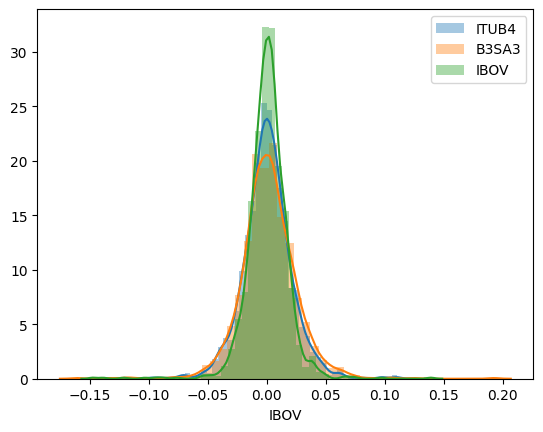

In [ ]:
# distribuição normal
for ticker in tickers:
  sns.distplot(returns[ticker].dropna())

plt.legend(tickers)
plt.show()

In [ ]:
# utilizando o df_ibov apenas pra fazer a predição do valor de fechamento
df_ibov_ml = df_ibov

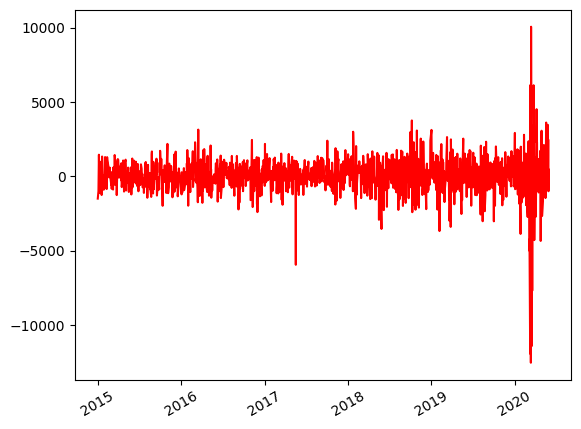

In [ ]:
# variações
import matplotlib.dates as mdates
import datetime as dt

df_ibov_ml['Variation'] = df_ibov_ml['Close'].sub(df_ibov_ml['Open'])

x = df_ibov_ml.index
y = df_ibov_ml ['Variation']

plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)

plt.show()


In [ ]:
df_ibov_ml.drop(columns=['Variation'], inplace=True) # trabalharemos apenas com uma variável para Close

# Dataset COVID-19

## Importação do Dataset COVID-19 do Kaggle

In [ ]:
# creating a dataframe
#import io
#covid_file = io.BytesIO(covid_file['covid_brasil.xlsx'])

In [ ]:
# testing our file
df_covid_file = pd.read_excel('drive/My Drive/Estudos/PUCMINAS/TCC/covid_brasil.xlsx')
# dataset = pd.read_excel('covid_brasil.xlsx')

## Tratamentos e Análises do dataset COVID-19

In [ ]:
# filtering only Date and number of Cases
df_covid = df_covid_file.filter(['data', 'regiao', 'casosAcumulado'], axis=1)

In [ ]:
# Grouping by date and re-converting to data_frame
# df_covid = df_covid.groupby(['data'])['casosAcumulado'].agg('sum').to_frame()

df_covid = df_covid.loc[df_covid['regiao'] == 'Brasil']
df_covid = df_covid.drop('regiao', 1)

<class 'pandas.core.frame.DataFrame'>
         data  casosAcumulado
92 2020-05-28          438238
93 2020-05-29          465166
94 2020-05-30          498440
95 2020-05-31          514200
96 2020-06-01          526447


In [ ]:
# reseting the index
df_covid.reset_index(inplace=True)
df_covid.rename(columns = {'data': 'Date', 'casosAcumulado':'Confirmed Cases'}, inplace=True)

In [ ]:
# merge df_acoes with df_covid (left join)
df_merge = df_acoes.merge(df_covid, on='Date', how='left')

# replace the null value with zero
df_merge['Confirmed Cases'] = df_merge['Confirmed Cases'].fillna(0)
print(df_merge)

# replace the null value with zero
df_merge['Confirmed Cases'] = df_merge['Confirmed Cases']
df_merge.drop('index', 1, inplace=True)

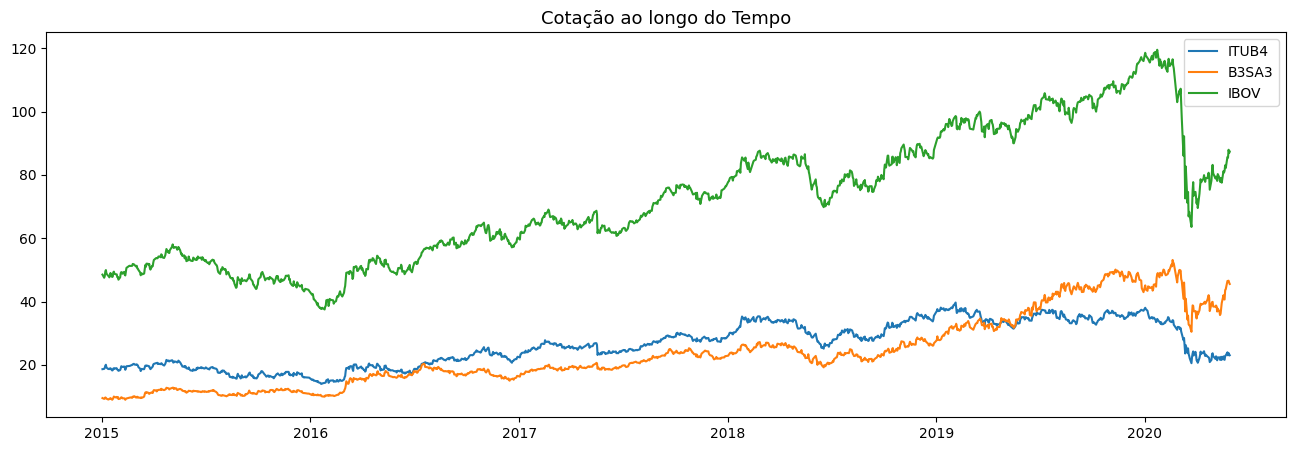

In [ ]:
# ploting the cotations
plt.figure(figsize=(16, 5))
for ticker in tickers:
  plt.plot(df_merge['Date'], df_merge[ticker])

plt.legend(tickers)
plt.title('Cotação ao longo do Tempo', fontsize = 13)
plt.show()

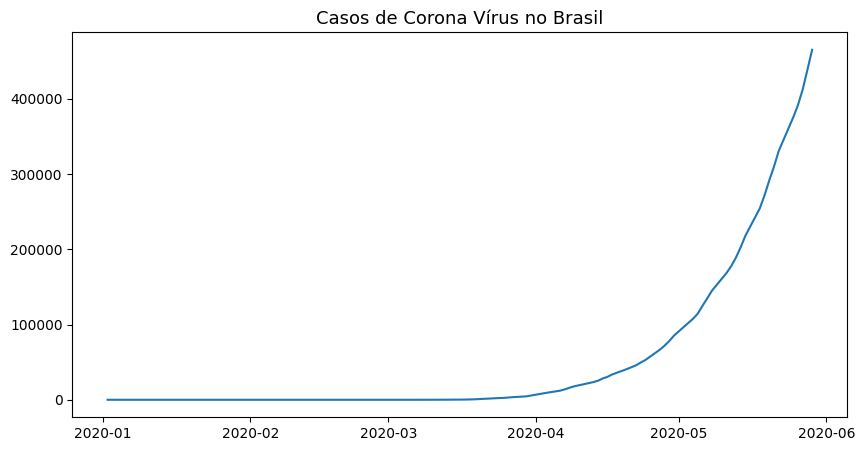

In [ ]:
start_filter = '2020-01-01'
end_filter = '2020-06-01'
filter_2020 = (df_merge['Date']>=start_filter) & (df_merge['Date']<=end_filter)
df_merge_2020 = df_merge[filter_2020]

covid_date = df_merge_2020['Date']
covid_cases = df_merge_2020['Confirmed Cases']

plt.figure(figsize=(10, 5))
plt.plot(df_merge_2020['Date'], df_merge_2020['Confirmed Cases'])

plt.title('Casos de Corona Vírus no Brasil', fontsize = 13)
plt.show()

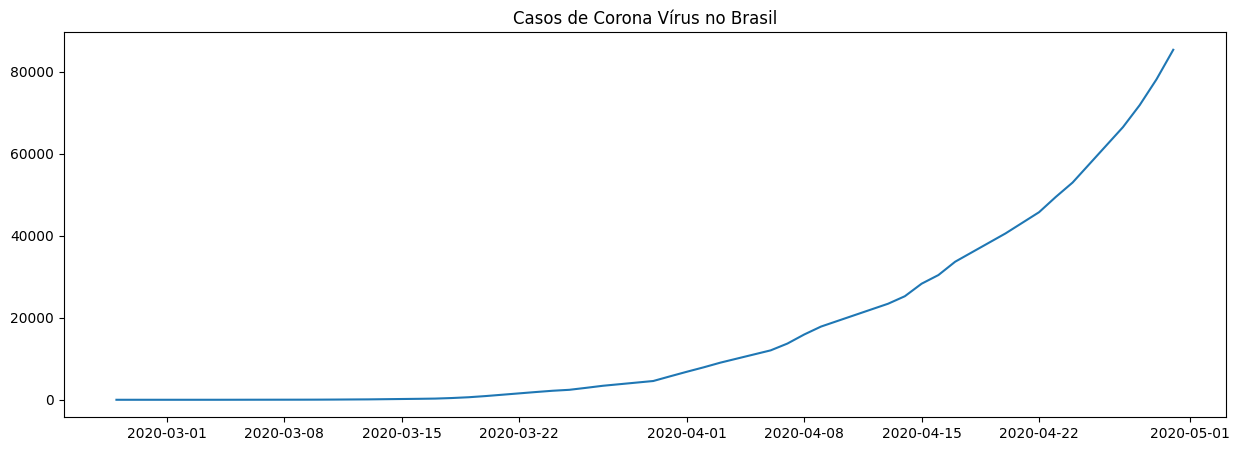

In [ ]:
start_filter = '2020-02-26'
end_filter = '2020-04-30'
filter_2020 = (df_merge['Date']>=start_filter) & (df_merge['Date']<=end_filter)
df_merge_2020 = df_merge[filter_2020]

covid_date = df_merge_2020['Date']
covid_cases = df_merge_2020['Confirmed Cases']

plt.figure(figsize=(15, 5))
plt.plot(df_merge_2020['Date'], df_merge_2020['Confirmed Cases'])

plt.title('Casos de Corona Vírus no Brasil')
plt.show()

# Análise dos Datasets em Conjunto e Correlação

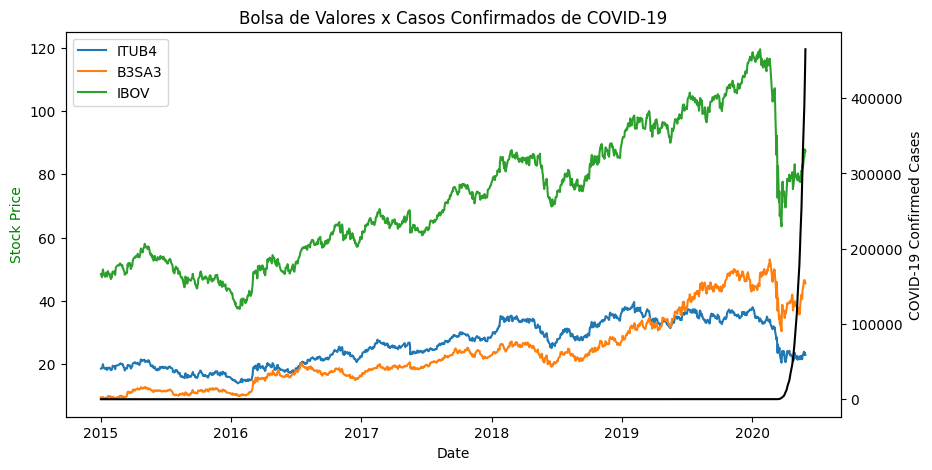

In [ ]:
# Creating the PLOT
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

# setting the x axis
x = df_merge['Date']
# setting the y2 axis
y2 = df_merge['Confirmed Cases']

# setting the y1 axis
for ticker in tickers:
  y1 = df_merge[ticker]
  ax1.plot(x, y1)

# setting the legend
plt.legend(tickers)

ax2 = ax1.twinx()
ax2.plot(x, y2, 'black')

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='g')
ax2.set_ylabel('COVID-19 Confirmed Cases', color='black')


plt.title('Bolsa de Valores x Casos Confirmados de COVID-19')
plt.show()

           Date      ITUB4      B3SA3     IBOV  Confirmed Cases
1233 2020-01-02  38.029999  45.110001  118.573              0.0
1234 2020-01-03  37.630001  43.810001  117.707              0.0
1235 2020-01-06  37.070000  43.389999  116.878              0.0
1236 2020-01-07  36.209999  44.790001  116.662              0.0
1237 2020-01-08  35.619999  44.669998  116.247              0.0
...         ...        ...        ...      ...              ...
1329 2020-05-25  23.959999  46.500000   85.663         374898.0
1330 2020-05-26  23.010000  46.500000   85.469         391222.0
1331 2020-05-27  23.730000  46.590000   87.946         411821.0
1332 2020-05-28  23.309999  45.950001   86.949         438238.0
1333 2020-05-29  23.040001  45.549999   87.403         465166.0

[101 rows x 5 columns]


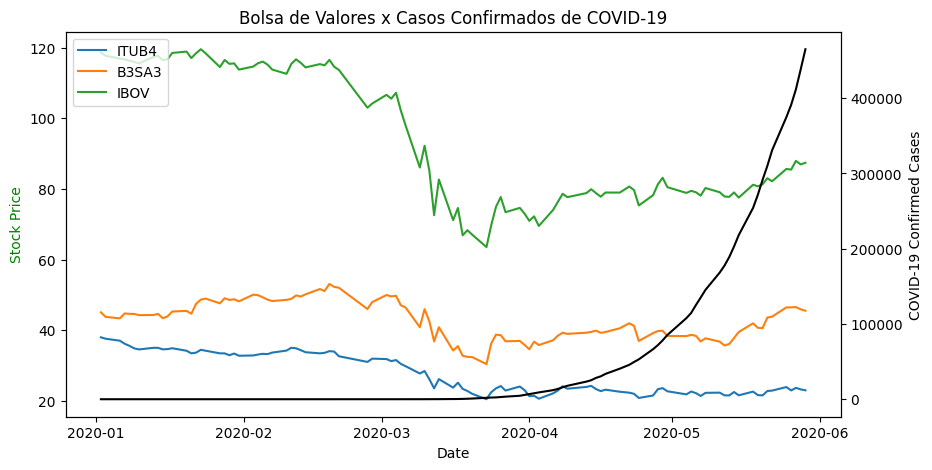

In [ ]:
# only 2020
start_filter = '2020-01-01'
end_filter = '2020-06-01'
filter_2020 = (df_merge['Date']>=start_filter) & (df_merge['Date']<=end_filter)
df_merge_2020 = df_merge[filter_2020]
print(df_merge_2020)

# Creating the PLOT
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

# setting the x axis
x = df_merge_2020['Date']
# setting the y2 axis
y2 = df_merge_2020['Confirmed Cases']

# setting the y1 axis
for ticker in tickers:
  y1 = df_merge_2020[ticker]
  ax1.plot(x, y1)

# setting the legend
plt.legend(tickers, loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'black')

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='g')
ax2.set_ylabel('COVID-19 Confirmed Cases', color='black')


plt.title('Bolsa de Valores x Casos Confirmados de COVID-19')
plt.show()

In [ ]:
# Correlação entre IBOV e Confirmed Cases
start_filter = '2020-01-01'
end_filter = '2020-06-01'
filter_2020 = (df_merge['Date']>=start_filter) & (df_merge['Date']<=end_filter)
df_merge_2020 = df_merge[filter_2020]
df_merge_2020['IBOV'].corr(df_merge_2020['Confirmed Cases'])

# Correlação negativa muito leve entre covid no brasil e queda do ibov quanto mais casos confirmados, mais é reduzido 

-0.3207027309543014

-0.3207027309543014

In [ ]:
df_merge_2020.corr()

,ITUB4,B3SA3,IBOV,Confirmed Cases
ITUB4,1.000000,0.781913,0.968441,-0.470914
B3SA3,0.781913,1.000000,0.864907,-0.078020
IBOV,0.968441,0.864907,1.000000,-0.321265
Confirmed Cases,-0.470914,-0.078020,-0.321265,1.000000


In [ ]:
df_merge_2020['IBOV'].corr(df_merge_2020['ITUB4'])

0.9684410921572549

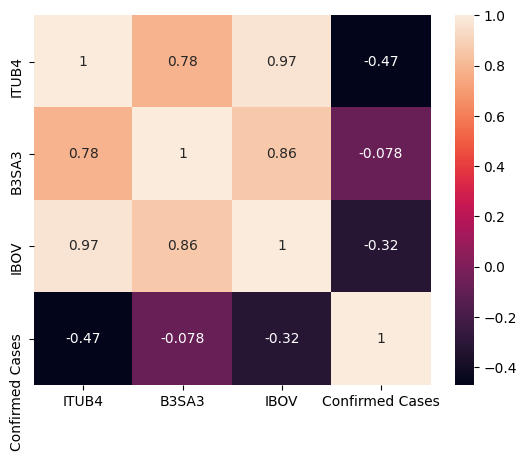

In [ ]:
import seaborn as sns
sns.heatmap(df_merge_2020.drop('Date', 1).corr(), annot = True)
plt.show()

In [ ]:
# correlacao
df_merge_2020.corr()

,ITUB4,B3SA3,IBOV,Confirmed Cases
ITUB4,1.000000,0.781913,0.968441,-0.470914
B3SA3,0.781913,1.000000,0.864907,-0.078020
IBOV,0.968441,0.864907,1.000000,-0.321265
Confirmed Cases,-0.470914,-0.078020,-0.321265,1.000000


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Confirmed Cases')

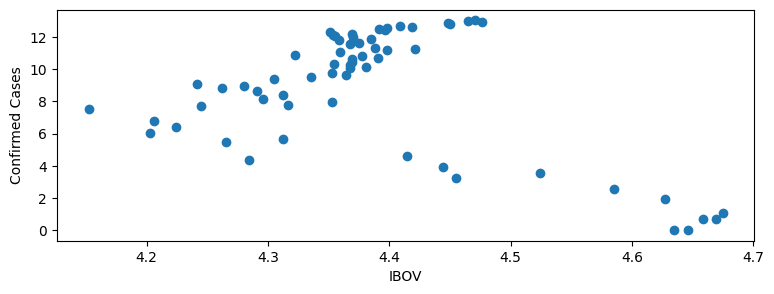

In [ ]:
# correlação de ibov vs casos confirmados de covid 19 + grafico de dispersão 
figure = plt.figure(figsize=(9,3))
plt.scatter(np.log(df_merge_2020['IBOV']), np.log(df_merge_2020['Confirmed Cases']))
plt.xlabel('IBOV')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'ITUB4')

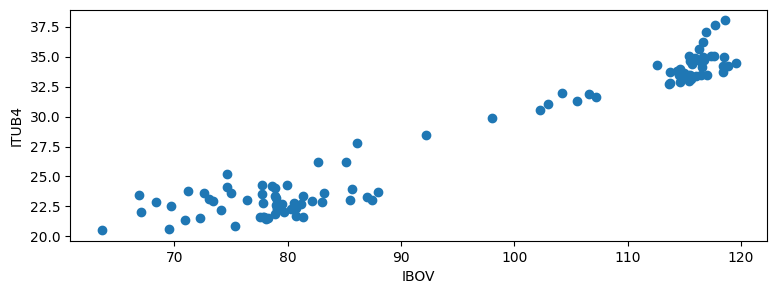

In [ ]:
# correlação do ibov com B3SA + grafico de dispersão
figure = plt.figure(figsize=(9,3))
plt.scatter((df_merge_2020['IBOV']), (df_merge_2020['ITUB4']))
plt.xlabel('IBOV')
plt.ylabel('ITUB4')

In [ ]:
# checking the bigger Close Price
df_desc = df_merge_2020.set_index('Date').drop('ITUB4', 1).drop('B3SA3', 1)
df_desc['IBOV'] = df_desc['IBOV']*1000
print('Máxima no período')
print(df_desc.max())

print('\nDatas de referência')
# Get the Date of the bigger Close Price
print(df_desc.idxmax())

Máxima no período
IBOV               119528.0
Confirmed Cases    465166.0
dtype: float64

Datas de referência
IBOV              2020-01-23
Confirmed Cases   2020-05-29
dtype: datetime64[ns]


In [ ]:
print('Mínima no período')
print(df_desc.min())

print('\nDatas de referência')
# Get the Date of the bigger Close Price
print(df_desc.idxmin())

Mínima no período
IBOV               63570.0
Confirmed Cases        0.0
dtype: float64

Datas de referência
IBOV              2020-03-23
Confirmed Cases   2020-01-02
dtype: datetime64[ns]
